# 1.1 Batch Gradient Descent

The batch gradient descent procedure takes in the following parameters:

1. fobj = Objective function
2. fgrad = function to compute the gradient
3. init = initial guess
4. alpha = step size or the learning rate
5. eps = convergence criterion or threshold for the algorithm to terminate

The function for a negative Gaussian function is :

$$
f(x) = - frac{10^4}{\sqrt((2\pi)^n|\Sigma|}exp[-1/2(x-\mu)^T\Sigma^{-1}(x-\mu)]
$$


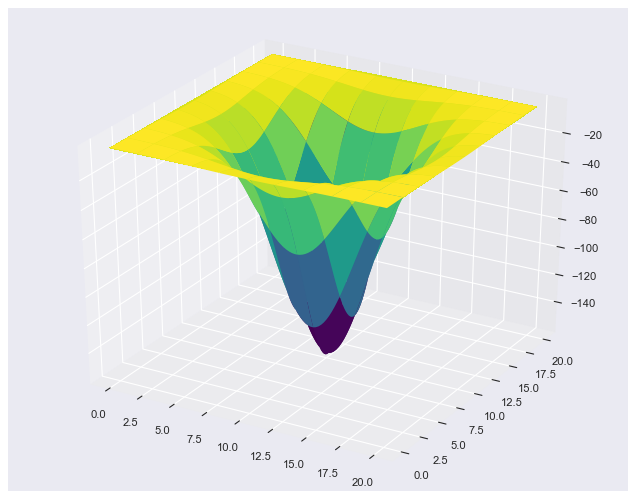

In [2]:
%matplotlib inline
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def getData():
    
    # load the fitting data for X and y and return as elements of a tuple
    # X is a 100 by 10 matrix and y is a vector of length 100
    # Each corresponding row for X and y represents a single data sample

    X = pl.loadtxt('fittingdatap1_x.txt')
    y = pl.loadtxt('fittingdatap1_y.txt')

    return (X,y) 

def getParameters():

    # load the parameters for the negative Gaussian function and quadratic bowl function
    # return a tuple that contains parameters for Gaussian mean, Gaussian covariance,
    # A and b for quadratic bowl in order

    data = pl.loadtxt('parametersp1.txt')

    gaussMean = data[0,:]
    gaussCov = data[1:3,:]

    quadBowlA = data[3:5,:]
    quadBowlb = data[5,:]

    return (gaussMean,gaussCov,quadBowlA,quadBowlb) 


mu, cov, A, b = getParameters()

# This is the negative gaussian function and its gradient implementation
# It returns function, grad as the values
def neg_gaussian_func(x):
    n = mu.shape[0]
    const = np.sqrt((2*np.pi)**n *(np.linalg.det(cov)))
    #f = -((10000)/const)*(np.exp(-1/2*np.dot(np.dot((x-mu).T, np.linalg.inv(cov)),(x-mu))))\
    f = -(10000.0/const)*(np.exp(-np.einsum('...k,kl,...l->...', x-mu, np.linalg.inv(cov), x-mu)/2))
    return f

def neg_gaussian_grad(x):
    #grad = -(neg_gaussian_func(x)*np.dot(np.linalg.inv(cov),(x-mu)))
    grad = -(neg_gaussian_func(x)*np.einsum('kl,...l->...k', np.linalg.inv(cov), x-mu))
    return grad
    
def quadratic_bowl_func(x):
    f = ((0.5)*np.einsum('...k,kl,...l->...', x, A, x) - np.einsum('...k,k->...', x, b))
    return f

def quadratic_bowl_grad(x):
    grad = np.dot(A,x) - b
    return grad
    
def batch_gradient_descent(fobj, fgrad, init, alpha=0.01, eps=10e-8, lambd=0):
    x = init
    fgradv = []
    xv = []
    fv = []
    curr_fx = fobj(x)
    while True :
        grad = fgrad(x)
        prev_fx = curr_fx
        
        # Parameter update
        x = x - np.multiply(alpha, grad)
        
        # Store all the values for viz
        fgradv.append(grad)
        xv.append(x)
        fv.append(curr_fx)
        #print x

        #Update the current value
        curr_fx = fobj(x)
        delta_fx = np.fabs(curr_fx - prev_fx)
        if (delta_fx < eps):
            break

    return xv, fgradv, fv

if __name__ == '__main__':
    N_gauss = 100
    X_gauss = np.linspace(0, 20, N_gauss)
    Y_gauss = np.linspace(0, 20, N_gauss)
    X_gauss, Y_gauss = np.meshgrid(X_gauss, Y_gauss)
    pos_gauss = np.empty(X_gauss.shape + (2,))
    pos_gauss[:, :, 0] = X_gauss
    pos_gauss[:, :, 1] = Y_gauss
    Z_gauss = neg_gaussian_func(pos_gauss)

    # Plot the Negative gaussian function
    fig = plt.figure(num=None, figsize=(10, 8), dpi=80)
    ax = fig.gca(projection='3d')
    ax.plot_surface(X_gauss, Y_gauss, Z_gauss, rstride=10, cstride=10, linewidth=1, antialiased=True,
                    cmap=cm.viridis)

    cset = ax.contourf(X_gauss, Y_gauss, Z_gauss, zdir='z', offset=-0.15, cmap=cm.viridis)
    plt.show()
    
    # Init values
    init = np.array([0.0, 0.0])
         
    # The negative guassian minimum function is 10.0, 10.0
    x_neg, grad_neg, fx_neg = batch_gradient_descent(neg_gaussian_func, neg_gaussian_grad, init)
    
    # TODO: Plot contour plot showing the effect of the init value
    
    # TODO: Plot contour plot showing the effect of the step size
    
    # TODO: Plot contour plot showing the convergence criterion
    
    # TODO: Norm of the gradient
    # TODO: Plot the above plots for multiplier of 1, so total of 8 plots

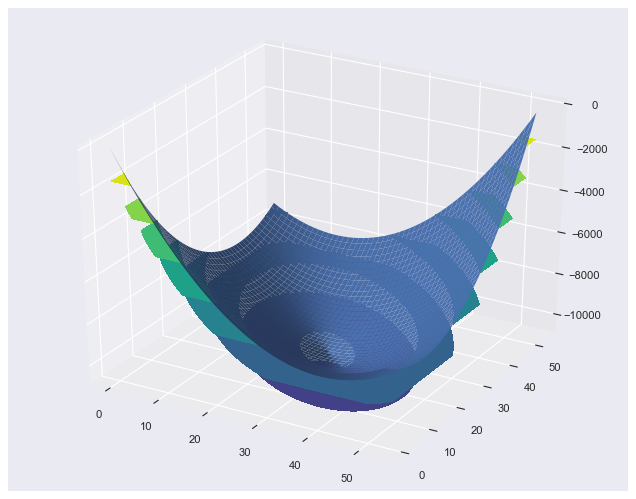

In [3]:
    N_quad = 300
    X_quad = np.linspace(0, 160/3, N_quad)
    Y_quad = np.linspace(0, 160/3, N_quad)
    X_quad, Y_quad = np.meshgrid(X_quad, Y_quad)
    pos_quad = np.empty(X_quad.shape + (2,))
    pos_quad[:, :, 0] = X_quad
    pos_quad[:, :, 1] = Y_quad
    Z_quad = quadratic_bowl_func(pos_quad)

    # Plot the Negative gaussian function
    fig = plt.figure(num=None, figsize=(10, 8), dpi=80)
    ax = fig.gca(projection='3d')
    ax.plot_surface(X_quad, Y_quad, Z_quad)

    cset = ax.contourf(X_quad, Y_quad, Z_quad, zdir='z',cmap=cm.viridis)
    plt.show()
    #The min value is print np.dot(np.linalg.inv([[10.0, 5.0],[5.0, 10.0]]), [400.0, 400.0])
    #[ 26.66666667  26.66666667]
    x_quad, grad_quad, fx_quad = batch_gradient_descent(quadratic_bowl_func, quadratic_bowl_grad, init)
    
    # TODO: Plot contour plot showing the effect of the init value
    
    # TODO: Plot contour plot showing the effect of the step size
    
    # TODO: Plot contour plot showing the convergence criterion
    
    # TODO: Norm of the gradient
    
    # TODO: Plot the above plots for multiplier of 1, so total of 8 plots

## 1.2 Finite difference method

Below is the code which calculates approximate Gradient with a two-sided finite difference methode. The partial derivatives are given by:

$$ \frac{\partial}{\partial x} = \frac{f(x + \delta) - f(x - \delta)}{2*\delta} $$


$$ \frac{\partial}{\partial y} = \frac{f(y + \delta) - f(y - \delta)}{2*\delta} $$

In [8]:
def approx_gradient_method(func, x, delta):
    # This is the alternate method
    #grad = (func(x+dv) - func(x-dv))/(2.0*delta)
    dv = np.eye(x.shape[0], dtype=float)
    dv = np.multiply(dv, delta)
    grad = np.empty(x.shape[0])
    for i in range(x.shape[0]):
        grad[i] = (func(x+dv[i]) - func(x-dv[i]))/(2.0*delta)
    return grad

print X_gauss.shape
#grad_closed_gauss = neg_gaussian_grad(X_gauss)
#grad_approx_gauss = approx_gradient_method(neg_gaussian_func, X_gauss, 1e-6)
print X_gauss.shape
#print grad_approx_gauss.shape



(100, 100)
(100, 100)


In [9]:
def acc_derivative(fa, fb):
    return (np.linalg.norm(fa - fb))/(max(np.linalg.norm(fa), np.linalg.norm(fb)))
M=np.array([8, 10])
lambd = np.exp(np.linspace(-8, 10, 50))

# Taking theta as 0
plt.figure(1,figsize=(20, 2), dpi=80)
for i in range(M.shape[0]):
    theta = np.zeros(M[i]+1)
    grad_closed_ls = sum_of_squares_grad(X, Y, M[i], theta)
    accuracy = []
    for j in range(lambd.shape[0]):
        grad_approx_ls = approx_gradient_method(sum_of_squares, X, Y, M[i], theta, lambd[j])
        accuracy.append(acc_derivative(grad_closed_ls, grad_approx_ls))
    plt.subplot(1, M.shape[0], i+1)
    plt.plot(np.log(lambd), accuracy, 'r-')
    label = 'Accuracy of Numerical derivative (M=' + str(M[i]) + ')'
    plt.xlabel('Log(Delta values)')
    plt.ylabel('Accuracy')
    plt.title(label)
plt.savefig('2b')

# TODO extend this function on vector of values and plot the accuracy of the
# approximate gradient method vs closed form 
# Plot different graphs of the same with varying value of delta
# Also can plot a graph between the 2 graphs at a point with varying values of delta
# Maybe we can plot different lines representing different points vs delta

NameError: name 'sum_of_squares_grad' is not defined

## 1.3 Stochastic Gradient Descent

In this part implementing both Batch gradient descent and stochastic gradient descent
on the least squares. 

$$ J(\theta ; X, y)  = \parallel X\theta - y\parallel^2$$

$$ J(\theta ; X, y)  = \sum_i(x^{(i)T}\theta - y^{(i)})^2 $$

Following are the parts

1. Implement batch gradient descent on the above cost function
2. Implement stochastic gradient descent

Implement the closed form solution to verify answers.



In [10]:
X_ls, y_ls = getData()
def least_squares_func(theta):
    #A = np.einsum('i...,i->i...', np.einsum('...k,kl->...l', X_ls, theta), -y_ls)
    A = np.dot(X_ls, theta) - y_ls
    J_theta = np.dot(A.T, A)
    #J_theta = np.sum(A**2)/(2.0*X_ls.shape[0])
    return J_theta

def least_squares_grad(theta):
    #grad = 2.0*(np.einsum('...k,kl,...l->...', X_ls, X_ls, theta)-np.einsum('...k,k->...', X_ls, y_ls))
    #grad = 2.0*(np.dot(np.dot(X_ls.T,X_ls), theta) - np.dot(X_ls.T,y_ls))
    loss = np.dot(X_ls, theta) - y_ls
    grad = 2.0*np.dot(X_ls.T, loss)
    return grad

def least_squares_closed():
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X_ls.T, X_ls)), X_ls.T), y_ls)
    return theta

print "The closed form theta is "
print least_squares_closed()
init_ls = np.zeros(10)
x_ls, grad_ls, fx_ls = batch_gradient_descent(least_squares_func, least_squares_grad, init_ls, 1e-6)
print x_ls[-1]
#grad_closed_ls = least_squares_grad(init_ls)
#print grad_closed_ls
#grad_approx_ls = approx_gradient_method(least_squares_func, init_ls, 1e-6)
#print grad_approx_ls

The closed form theta is 
[  0.5032541   -2.3367948   -6.31670032   6.81230107  -1.06337989
   6.67469398   3.4118044   -0.45573592 -12.94593466  15.73289812]
[  0.50325522  -2.3367968   -6.3166987    6.81230047  -1.06338088
   6.67469146   3.41179915  -0.45573642 -12.94593385  15.73289844]


The closed form theta is 
[  0.5032541   -2.3367948   -6.31670032   6.81230107  -1.06337989
   6.67469398   3.4118044   -0.45573592 -12.94593466  15.73289812]
[  0.50325522  -2.3367968   -6.3166987    6.81230047  -1.06338088
   6.67469146   3.41179915  -0.45573642 -12.94593385  15.73289844]


NameError: name 'stochastic_gradient_descent' is not defined

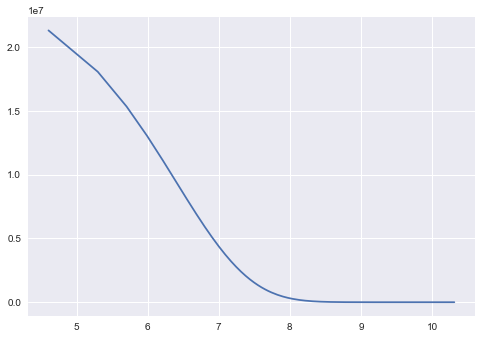

In [13]:
    X_ls, y_ls = getData()
    
    #batch
    print("The closed form theta is ")
    print(least_squares_closed())
    init_ls = np.zeros(10)
    x_ls, grad_ls, fx_ls = batch_gradient_descent(least_squares_func, least_squares_grad, init_ls, 1e-6)
    print(x_ls[-1])
    #grad_closed_ls = least_squares_grad(init_ls)
    #print grad_closed_ls
    #grad_approx_ls = approx_gradient_method(least_squares_func, init_ls, 1e-6)
    #print grad_approx_ls
    it_ls = []
    for i in range(1, len(fx_ls)+1):
        it_ls.append(i)
    it_ls = np.asarray(it_ls)
    it_ls_norm = it_ls*len(y_ls)
    plt.plot(np.log(it_ls_norm), fx_ls, label = 'batch')
    
    #sgd
    init_ls = np.zeros(10)
    x_sgd, grad_sgd, fx_sgd, it_sgd = stochastic_gradient_descent(least_squares_func, point_least_squares_grad, init_ls, alpha = 1000000, eps= 1e-4)
    it_sgd = []
    for i in range(1, len(fx_sgd)+1):
        it_sgd.append(i)
    it_sgd = np.asarray(it_sgd)
    plt.plot(np.log(np.log(it_sgd)), fx_sgd, label = 'sgd')
    
    #mini batch size 2
    batch_size = 2
    init_ls = np.zeros(10)
    x_mbgd, grad_mbgd, fx_mbgd, itv = mini_gradient_descent(least_squares_func, mini_least_squares_grad, init_ls , batch_size, eps = 1e-4)
    it_v = []
    for i in range(1, len(fx_mbgd)+1):
        it_v.append(i)
    it_v = np.asarray(it_v)
    it_v_norm = it_v*batch_size
    plt.plot(np.log(it_v_norm), fx_mbgd, label = 'mini batch size 2')
    
    #mini batch size 5
    batch_size = 5
    init_ls = np.zeros(10)
    x_mbgd, grad_mbgd, fx_mbgd, itv = mini_gradient_descent(least_squares_func, mini_least_squares_grad, init_ls , batch_size, eps = 1e-4)
    it_v = []
    for i in range(1, len(fx_mbgd)+1):
        it_v.append(i)
    it_v = np.asarray(it_v)
    it_v_norm = it_v*batch_size
    plt.plot(np.log(it_v_norm), fx_mbgd, label = 'mini batch size 5')
    
    #mini batch size 10
    batch_size = 10
    init_ls = np.zeros(10)
    x_mbgd, grad_mbgd, fx_mbgd, itv = mini_gradient_descent(least_squares_func, mini_least_squares_grad, init_ls , batch_size, eps = 1e-4)
    it_v = []
    for i in range(1, len(fx_mbgd)+1):
        it_v.append(i)
    it_v = np.asarray(it_v)
    it_v_norm = it_v*batch_size
    plt.plot(np.log(it_v_norm), fx_mbgd, label = 'mini batch size 10')
    
#    #mini batch size 20
#    batch_size = 20
#    init_ls = np.zeros(10)
#    x_mbgd, grad_mbgd, fx_mbgd, itv = mini_gradient_descent(least_squares_func, mini_least_squares_grad, init_ls , batch_size, alpha=10000000, eps = 1e-4)
#    it_v = []
#    for i in range(1, len(fx_mbgd)+1):
#        it_v.append(i)
#    it_v = np.asarray(it_v)
#    it_v_norm = it_v*batch_size
#    plt.plot(np.log(it_v_norm), fx_mbgd, label = 'mini batch size 20')
#    
#    #mini batch size 50
#    batch_size = 50
#    init_ls = np.zeros(10)
#    x_mbgd, grad_mbgd, fx_mbgd, itv = mini_gradient_descent(least_squares_func, mini_least_squares_grad, init_ls , alpha=10000000, 50)
#    it_v = []
#    for i in range(1, len(fx_mbgd)+1):
#        it_v.append(i)
#    it_v = np.asarray(it_v)
#    it_v_norm = it_v*batch_size
#    plt.plot(np.log(it_v_norm), fx_mbgd, label = 'mini batch size 50')
#   
    #formatting of the plot
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

In [71]:
batch_size = 100
X_tr = np.split(X_ls, batch_size)
for i in range(batch_size):
    X_tr[i].shape


Reached convergence
[  0.50407172  -2.33765745  -6.31620587   6.81094296  -1.06711144
   6.67291362   3.41305607  -0.45693819 -12.94587102  15.7306891 ]


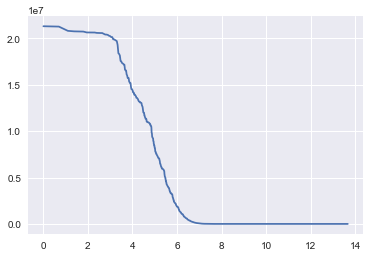

In [92]:
def point_least_squares_grad(theta, x, y):
    grad = 2.0*x*(np.dot(x.T, theta) - y)
    return grad

def momentum(alpha, t, k):
    return (alpha+t)**(-k)

# Batch_size should be multiple of the X_ls.shape[0], otherwise np.split() won't work
# this can be worked around by manually splitting up the data set
def stochastic_gradient_descent(fobj, fgrad, init, alpha, eps=1e-6):
    # Here the eta value is (alpha+t)^-k k belongs to (0.5, 1)
    it = 1
    x = init
    fgradv = []
    xv = []
    fv = []
    itv = []
    curr_fx = fobj(x)
    while True:
        for i in range(X_ls.shape[0]):
            grad = fgrad(x, X_ls[i], y_ls[i])
            prev_fx = curr_fx
            
            # Store all the values for viz
            fgradv.append(grad)
            xv.append(x)
            fv.append(curr_fx)
            itv.append(it)
            # Parameter update
            x = x - momentum(alpha,it, 0.9)*grad
            it = it+1
        

            #Update the current value
            curr_fx = fobj(x)
            delta_fx = np.fabs(curr_fx - prev_fx)
            if (delta_fx < eps):
                print "Reached convergence"
                print x
                return xv, fgradv, fv, itv

init_ls = np.zeros(10)
x_sgd, grad_sgd, fx_sgd, it_sgd = stochastic_gradient_descent(least_squares_func, point_least_squares_grad, init_ls, 1000000)
plt.plot(np.log(it_sgd), fx_sgd)


## 1.4 Mini-batch gradient descent

Plot the objective function vs iteration number, there are jumps in the SGD these can be smoothened with mini-batch gradient descent.

Reached convergence
[  0.50062409  -2.336578    -6.31789212   6.81205555  -1.06445113
   6.67461375   3.41192572  -0.45674147 -12.94553847  15.73125726]


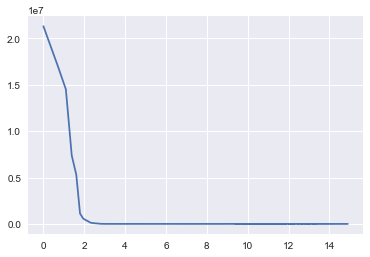

In [91]:
def mini_least_squares_grad(theta, X_tr, y_tr):
    loss = np.dot(X_tr, theta) - y_tr
    grad = 2.0*np.dot(X_tr.T, loss)
    return grad

# Batch_size should be multiple of the X_ls.shape[0], otherwise np.split() won't work
# this can be worked around by manually splitting up the data set
def mini_gradient_descent(fobj, fgrad, init, batch_size, alpha=100000, eps=1e-6):
    # Here the eta value is (alpha+t)^-k k belongs to (0.5, 1)
    it = 1
    x = init
    fgradv = []
    xv = []
    fv = []
    itv = []
    curr_fx = fobj(x)
    X_tr = np.split(X_ls, batch_size)
    y_tr = np.split(y_ls, batch_size)
    while True:
        for i in range(batch_size):
            grad = fgrad(x, X_tr[i], y_tr[i])
            prev_fx = curr_fx

            # Store all the values for viz
            fgradv.append(grad)
            xv.append(x)
            fv.append(curr_fx)
            itv.append(it)
            
            # Parameter update
            x = x - momentum(alpha,it, 0.9)*grad
            it = it+1
        

            #Update the current value
            curr_fx = fobj(x)
            delta_fx = np.fabs(curr_fx - prev_fx)
            if (delta_fx < eps):
                print "Reached convergence"
                print x
                return xv, fgradv, fv, itv

init_ls = np.zeros(10)
x_mbgd, grad_mbgd, fx_mbgd, itv = mini_gradient_descent(least_squares_func, mini_least_squares_grad, init_ls , 10)
plt.plot(np.log(itv), fx_mbgd)
plt.show()